In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json
import glob

In [53]:
model_files = glob.glob('metrics/small_model_results/*')
models = [res.split("/")[-1].split("-")[0] for res in model_files]
print(models)

['mbv2', 'proxyless', 'mcunet', 'mbv2', 'mcunet', 'mcunet', 'proxyless']


In [64]:
results = []
for i, model_file in enumerate(model_files):
    model = models[i]
    result = json.load(open(model_file, 'r'))
    for row in result:
        model_info = row["model"]
        sparsity = model_info.split("/")[-2]
        update = model_info.split("/")[-1]
        dataset = model_file.split("-")[-1].split(".")[0]
        row["model"] = model
        row["sparsity"] = sparsity
        row["update"] = update
        if dataset == "celeba":
            dataset = "CelebA"
        if dataset == "miniimagenet":
            dataset = "Tiny ImageNet"
        if dataset == "miniperson":
            dataset = "Person Detection"
        row["dataset"] = dataset
        results.append(row)

df = pd.DataFrame(results)
df = df.rename(columns={"epoch": "step"})
df["step"] = df["step"] * 15
df.head()

,model,mode,step,accuracy,loss,sparsity,update,dataset
0,mbv2,train,0,26.851852,1.549756,sparse_50kb,sgd_qas_nomom,CelebA
1,mbv2,train,15,25.925926,1.486029,sparse_50kb,sgd_qas_nomom,CelebA
2,mbv2,train,30,25.000000,1.498847,sparse_50kb,sgd_qas_nomom,CelebA
3,mbv2,train,45,34.259258,1.336529,sparse_50kb,sgd_qas_nomom,CelebA
4,mbv2,train,60,37.962963,1.309774,sparse_50kb,sgd_qas_nomom,CelebA


['CelebA' 'Person Detection' 'Tiny ImageNet']


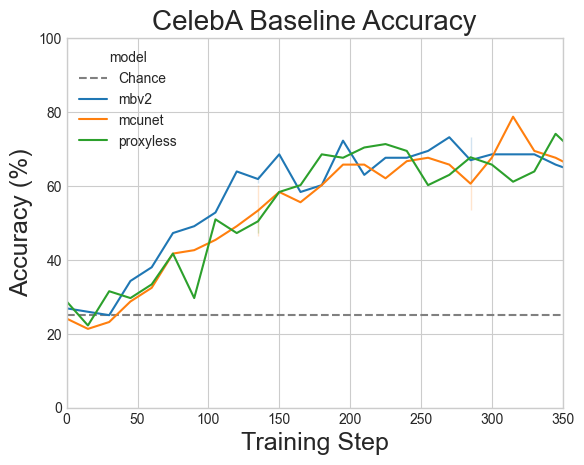

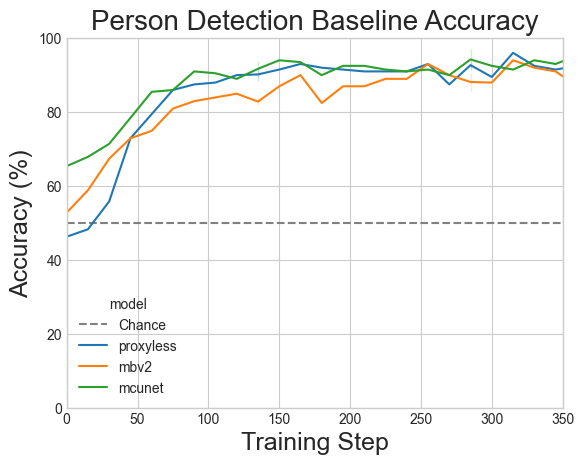

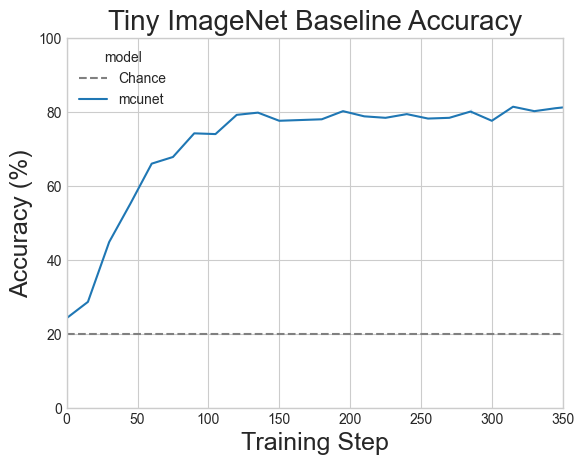

In [65]:
plt.style.use('seaborn-whitegrid')
print(df["dataset"].unique())
for dataset in df["dataset"].unique():
    dataset_df = df[df["dataset"] == dataset]

    if dataset == "Person Detection":
        plt.axhline(y=50, color='gray', linestyle='--', label='Chance')
    elif dataset == "CelebA":
        plt.axhline(y=25, color='gray', linestyle='--', label='Chance')
    elif dataset == "Tiny ImageNet":
        plt.axhline(y=20, color='gray', linestyle='--', label='Chance')
    sns.lineplot(data=dataset_df, x="step", y="accuracy", hue="model", dashes=False)
    plt.ylim(0, 100)
    plt.xlim(0, 350)
    plt.title(f"{dataset} Baseline Accuracy", fontsize=20)
    plt.xlabel("Training Step", fontsize=18)
    plt.ylabel("Accuracy (%)", fontsize=18)
    plt.show()
